# MCSE : Datathon

Archishman VB (TA-MCSE)

# Datathon


The dataset comprises information on 920 individuals, including their demographics, lifestyle factors, family medical history, and clinical measurements. The goal is to analyze this dataset to identify correlations between different variables and gain insights into the factors influencing the risk of developing heart disease. Using data analysis techniques, including machine learning algorithms, the researcher aims to predict potential risk factors and contribute to public health interventions for heart disease prevention.



Dataset Features:

id (Unique id for each patient)

age (Age of the patient in years)

origin (place of study)

sex (Male/Female)

cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol (serum cholesterol in mg/dl)

fbs (if fasting blood sugar > 120 mg/dl)

restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]

thalach: maximum heart rate achieved

exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: [normal; fixed defect; reversible defect]

num: the predicted attribute. Diagnosis of heart disease, often used as the target variable indicating heart disease presence (values may range from 0–4, with higher values indicating greater disease severity).


# Questions:-

Unit-1

Classify the features in the Heart Disease dataset into their appropriate data types (ordinal, nominal, interval, or ratio). Provide a rationale for each classification.
A summary statistic provides a numerical summary of a specific feature within the dataset.There are two commonly used categories of summary statistics: those that indicate the central tendency and those that indicate the spread of the data. Identify the most appropriate measure of central tendency for each attribute in the dataset and state its corresponding value. Additionally, calculate the standard deviation and range of values for each column.
 Identify and describe any data quality issues or inconsistencies within the Heart Disease dataset. What steps would you take to clean and preprocess the data to ensure its accuracy and reliability for further analysis?
Using a histogram and box plot, assess the presence of outliers in the 'age' and 'chol' variables. Describe the visualizations, identify any potential outliers, and explain how you determined their presence or absence.
What actions would you take to resolve the presence of outliers? Visualize the changes using box plots and histograms.
Examine the normal probability plot (Q-Q plot) for the 'chol' variable in the Heart Disease dataset. Based on the shape and trend of the plot, what conclusions can be drawn? Provide a rationale for your conclusions.
Calculate the correlation between 'Age' and all the other numerical variables (e.g., 'trestbps' or 'thalach’'). Set a correlation threshold and create a heatmap to visualize the relationships.
Generate a pairplot that includes the variables 'age', 'chol', and 'thalach' while using 'num' as the hue in the dataset. What insights can be gained from the pairplot, and how does it help in visualizing the relationships between the given features and heart disease prevalence?



Unit-2

9.Is there a significant difference in the mean cholesterol levels between individuals with heart disease (num > 0) and those without heart disease (num = 0)? Formulate null and alternative hypotheses and employ a T-test to examine this relationship. Plot a histogram to visualize the distribution of cholesterol levels for each group. Assume a significance level of 0.05.

10. Calculate the margin of error to quantify the precision of the analysis done previously and infer what you can deduce from the results.

Unit-3

11. Perform a linear regression analysis to predict the variable chol (cholesterol level) using the features age, trestbps (resting blood pressure), thalch (maximum heart rate achieved), oldpeak (ST depression induced by exercise), and slope (slope of the peak exercise ST segment). Validate the model using performance metrics like RMSE, MSE, and R-squared values to assess the model's effectiveness.

12. To improve the model’s predictive power in assessing heart disease risk, consider what additional features could be engineered from the existing data. For instance, how might combining certain features or creating categorical variables, like AgeGroup or a RiskScore combining blood pressure and cholesterol levels, provide more insights into a person's likelihood of heart disease? Explain what new variables you would create and why they could enhance the predictive accuracy of the model.


In [3]:
import pandas as pd
import numpy as np

heart_data = pd.read_csv('heart_disease.csv')

In [4]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
heart_data.shape

(920, 16)

In [6]:
#  1

# Classification of variables based on the dataset's features

# Ordinal features (features with natural ordering)
ordinal_features = ['slope', 'cp']  # E.g., 'slope' values (upsloping, flat, downsloping) imply an order.

# Nominal features (categorical with no inherent order)
nominal_features = ['sex', 'restecg', 'thal', 'dataset']  # 'sex' and 'thal' are categories without an order.

# Interval features (numerical but zero does not indicate the absence of something - not common here)
interval_features = []

# Ratio features (numerical, where zero implies an absence and ratios are meaningful)
ratio_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']  # Age, blood pressure, and cholesterol are continuous.


In [8]:
#  2

# Calculate summary statistics for the dataset
summary_statistics = heart_data.describe().T  # Transpose for readability

# Add the range
summary_statistics['range'] = summary_statistics['max'] - summary_statistics['min']
summary_statistics[['mean', '50%', 'std', 'range']]


,mean,50%,std,range
id,460.500000,460.5,265.725422,919.0
age,53.510870,54.0,9.424685,49.0
trestbps,132.132404,130.0,19.066070,200.0
chol,199.130337,223.0,110.780810,603.0
thalch,137.545665,140.0,25.926276,142.0
oldpeak,0.878788,0.5,1.091226,8.8
ca,0.676375,0.0,0.935653,3.0
num,0.995652,1.0,1.142693,4.0


In [10]:
#  3

# Check for missing values
missing_values = heart_data.isnull().sum()

# Check data types
data_types = heart_data.dtypes

# Display potential data quality issues
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)


Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Data Types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


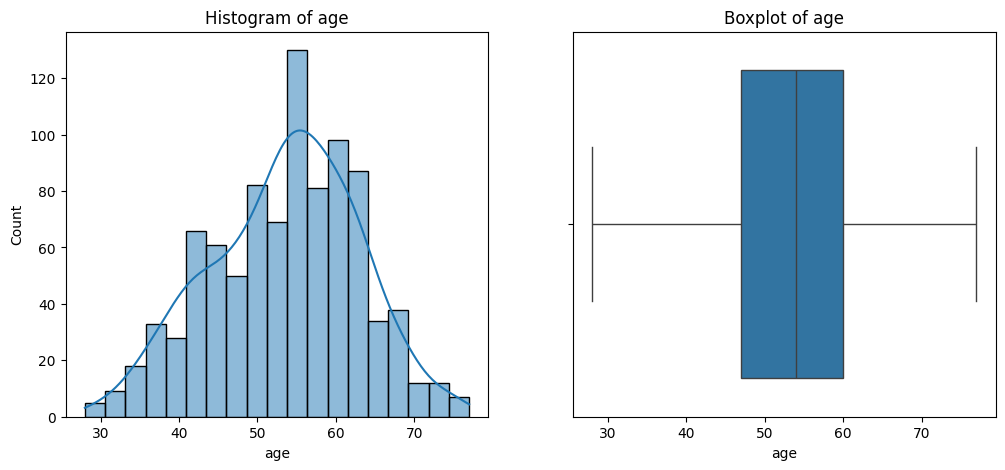

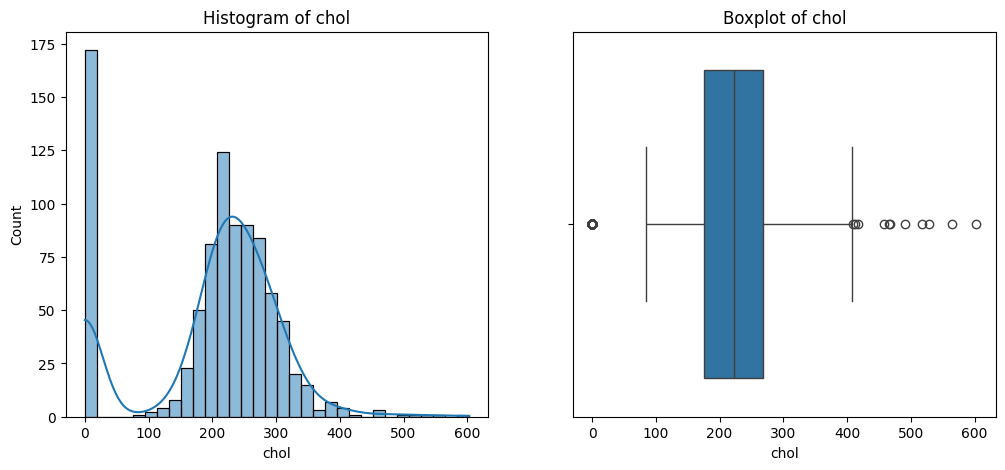

In [11]:
#  4

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram and boxplot for 'age' and 'chol'
for col in ['age', 'chol']:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(heart_data[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=heart_data[col])
    plt.title(f'Boxplot of {col}')

    plt.show()


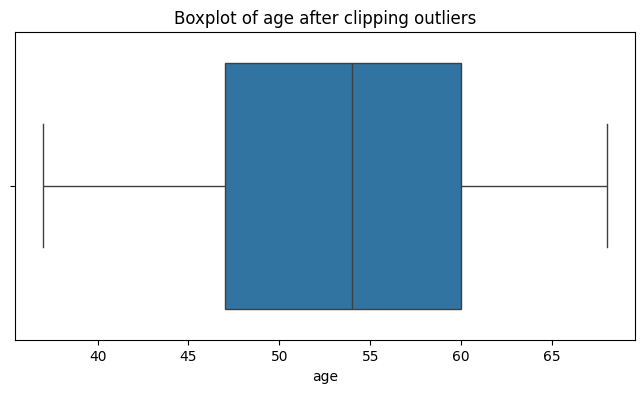

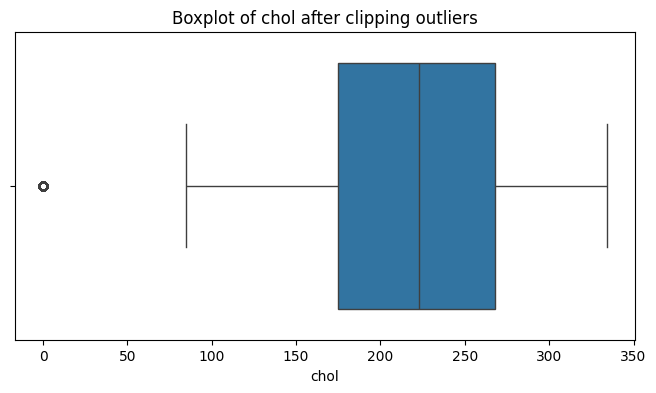

In [14]:
#  5

# Clip outliers in 'age' and 'chol' to the 5th and 95th percentiles
heart_data['age'] = heart_data['age'].clip(lower=heart_data['age'].quantile(0.05), upper=heart_data['age'].quantile(0.95))
heart_data['chol'] = heart_data['chol'].clip(lower=heart_data['chol'].quantile(0.05), upper=heart_data['chol'].quantile(0.95))

# Replot box plots for 'age' and 'chol' after clipping outliers
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['age', 'chol']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=heart_data[col])
    plt.title(f'Boxplot of {col} after clipping outliers')
    plt.show()


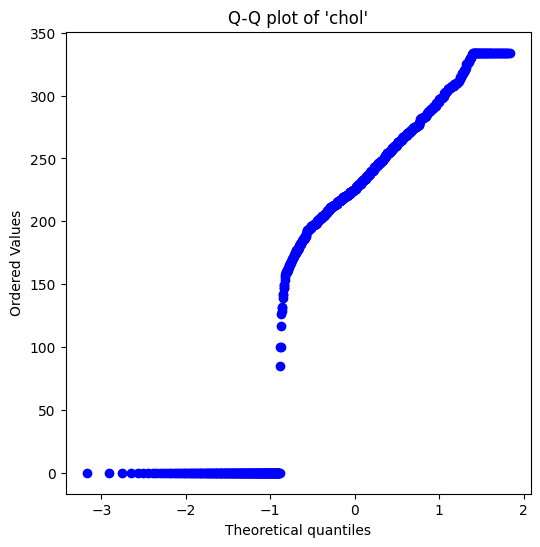

In [15]:
#  6

import scipy.stats as stats

# Q-Q plot for 'chol'
plt.figure(figsize=(6, 6))
stats.probplot(heart_data['chol'], dist="norm", plot=plt)
plt.title("Q-Q plot of 'chol'")
plt.show()


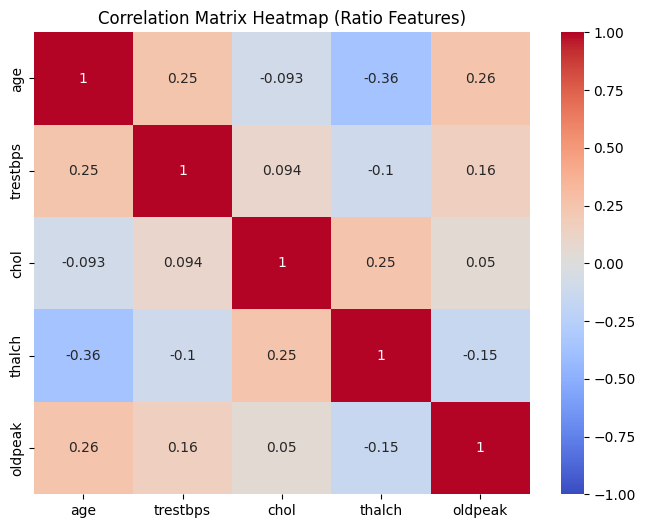

In [18]:
#  7


ratio_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Subset the data to include only ratio features
data_ratio = heart_data[ratio_features]

# Calculate the correlation matrix for the ratio features only
correlation_matrix = data_ratio.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (Ratio Features)")
plt.show()

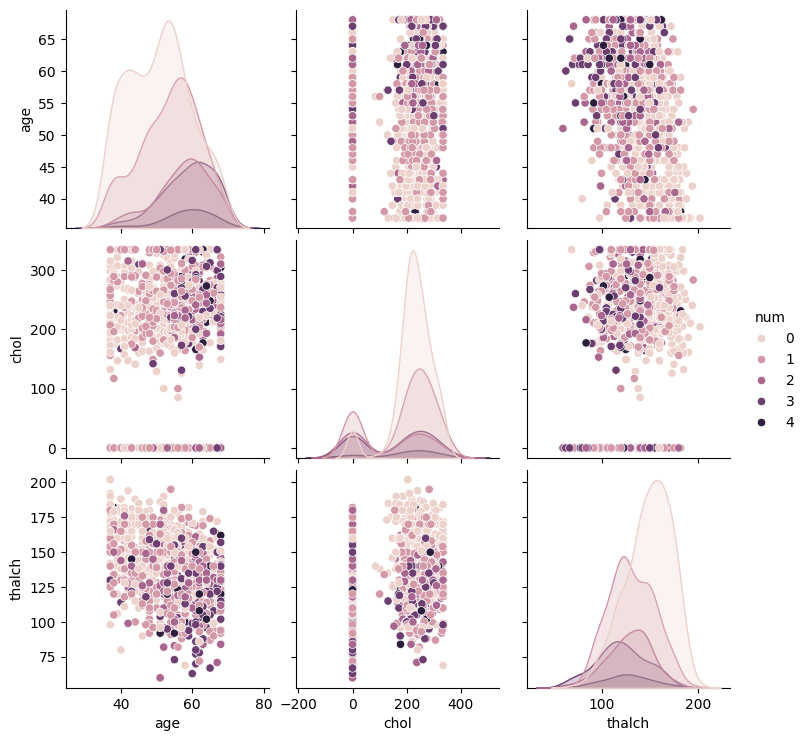

In [19]:
#  8

# Pairplot with 'num' as the hue
sns.pairplot(heart_data, vars=['age', 'chol', 'thalch'], hue='num')
plt.show()


T-statistic: nan, P-value: nan
Fail to reject the null hypothesis - No significant difference in mean cholesterol levels


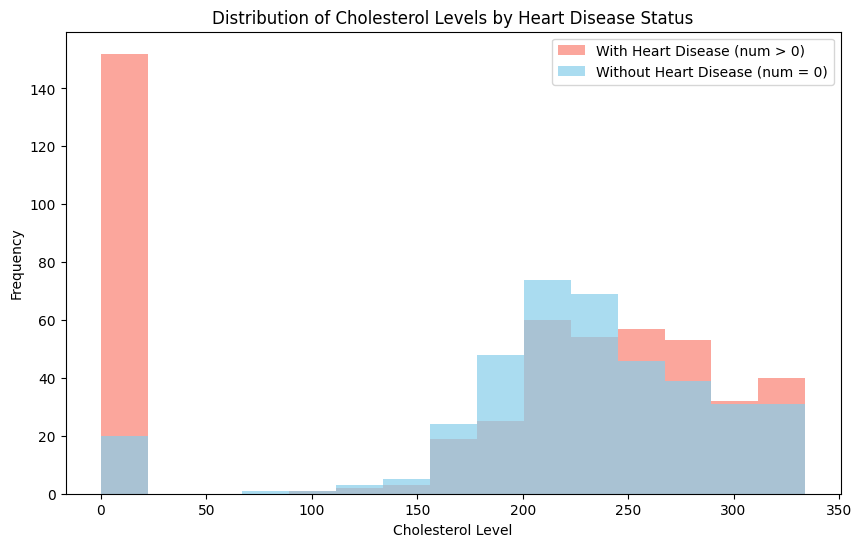

In [21]:
#  9

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Null Hypothesis (H0): There is no significant difference in the mean cholesterol levels between individuals with heart disease (num > 0) and those without heart disease (num = 0).
# Alternative Hypothesis (H1): There is a significant difference in the mean cholesterol levels between individuals with heart disease (num > 0) and those without heart disease (num = 0).

# Separate cholesterol levels based on heart disease presence
chol_heart_disease = heart_data[heart_data['num'] > 0]['chol']
chol_no_heart_disease = heart_data[heart_data['num'] == 0]['chol']

# Perform a T-test
t_stat, p_value = ttest_ind(chol_heart_disease, chol_no_heart_disease, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - Significant difference in mean cholesterol levels")
else:
    print("Fail to reject the null hypothesis - No significant difference in mean cholesterol levels")

# Plot histogram for visualization
plt.figure(figsize=(10, 6))
plt.hist(chol_heart_disease, alpha=0.7, label='With Heart Disease (num > 0)', color='salmon', bins=15)
plt.hist(chol_no_heart_disease, alpha=0.7, label='Without Heart Disease (num = 0)', color='skyblue', bins=15)
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.title("Distribution of Cholesterol Levels by Heart Disease Status")
plt.legend()
plt.show()



In [22]:
#  10

import numpy as np

# Calculate standard error and margin of error for cholesterol levels in two groups
std_err = np.std(chol_heart_disease - chol_no_heart_disease) / np.sqrt(len(heart_data))
margin_of_error = 1.96 * std_err  # For 95% confidence level
print("Margin of Error:", margin_of_error)


Margin of Error: nan


In [33]:
#  9, 10

import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Separate cholesterol levels based on the presence of heart disease (num > 0 or num = 0)
chol_heart_disease = heart_data[heart_data['num'] > 0]['chol'].dropna()
chol_no_heart_disease = heart_data[heart_data['num'] == 0]['chol'].dropna()

# Check for variability and sample size in each group
print("Heart Disease Group Cholesterol Stats:", chol_heart_disease.describe())
print("No Heart Disease Group Cholesterol Stats:", chol_no_heart_disease.describe())

# Perform the t-test only if both groups have enough data and variation
if len(chol_heart_disease) > 1 and len(chol_no_heart_disease) > 1:
    t_stat, p_value = ttest_ind(chol_heart_disease, chol_no_heart_disease, equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Calculate margin of error for 95% confidence level if p-value is meaningful
    if not np.isnan(p_value):
        margin_of_error = 1.96 * (np.std(chol_heart_disease) / np.sqrt(len(chol_heart_disease)))
        print("Margin of Error:", margin_of_error)
    else:
        print("Unable to calculate margin of error due to NaN p-value.")
else:
    print("One or both groups lack sufficient data or variation for a valid t-test.")


Heart Disease Group Cholesterol Stats: count    498.000000
mean     173.435141
std      121.875546
min        0.000000
25%        0.000000
50%      218.000000
75%      267.750000
max      334.100000
Name: chol, dtype: float64
No Heart Disease Group Cholesterol Stats: count    392.000000
mean     225.438265
std       70.235688
min        0.000000
25%      199.000000
50%      228.000000
75%      269.000000
max      334.100000
Name: chol, dtype: float64
T-statistic: -7.985288195452995, P-value: 4.7337043363295544e-15
Margin of Error: 10.69353995040171


Mean Squared Error (MSE): 9535.019731653823
R-squared: 0.13232462397800804


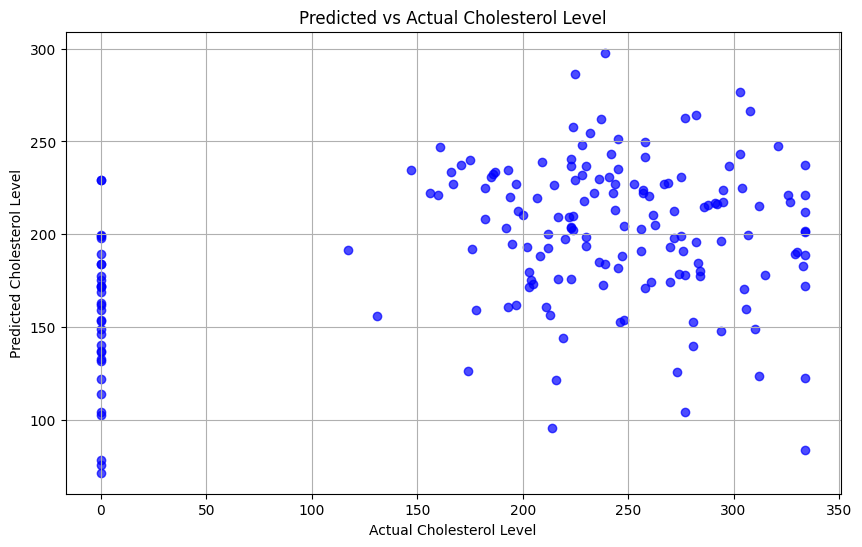

In [32]:
# 11

# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Select features and target variable
features = heart_data[['age', 'trestbps', 'thalch', 'oldpeak', 'ca', 'num']]  # Add or remove features as needed
target = heart_data['chol']  # The variable we aim to predict

# Handling missing values in features and target
features = features.fillna(features.median())
target = target.fillna(target.median())  # Fill NaN values in the target column

# Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Actual Cholesterol Level")
plt.ylabel("Predicted Cholesterol Level")
plt.title("Predicted vs Actual Cholesterol Level")
plt.grid(True)
plt.show()


Feature Engineering for Improved Predictions
Additional engineered features might include:

AgeGroup: Binning age into groups, e.g., young, middle-aged, senior.

RiskScore: Combining chol and trestbps into a single score that reflects both factors.

These features could enhance the predictive accuracy of the model by highlighting critical combinations of risk factors.